In [61]:
import snowflake.connector
import pandas as pd


cnn = snowflake.connector.connect(
    user="LUCKOSTER",
    password="*************",
    account="EPORRXE-WU15947",
    warehouse="project_warehouse",
    database="project_database",
    schema="project_schema"
    )

#cursor
cs = cnn.cursor()
sql = "SELECT * FROM project_sales"
cs.execute(sql)
df = cs.fetch_pandas_all()
cs.close()
cnn.close()

df.head()



Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  1577664060000000  136 Church St, New York City, NY 10001     12  1700.00   
1  1577602980000000     562 2nd St, New York City, NY 10001     12   600.00   
2  1576174860000000    277 Main St, New York City, NY 10001     12    11.95   
3  1577027580000000     410 6th St, San Francisco, CA 94016     12   149.99   
4  1576672680000000           43 Hill St, Atlanta, GA 30301     12    11.95   

                  City  Hour  Minute  
0   New York City (NY)     0       1  
1   New York City (NY)     7       3  
2   New York City (NY)    18      21  
3   San Francisco (CA)    15      13  
4         Atlanta (GA)    12      38

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int8   
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int8   
 7   Sales             185950 non-null  float64
dtypes: float64(2), int8(2), object(4)
memory usage: 8.9+ MB


### Question 1: What was the best month for sales? How much was earned that month?

In [55]:
results = df.groupby(["Month"])[["Quantity Ordered", "Price Each", "Sales"]].sum()
results

Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

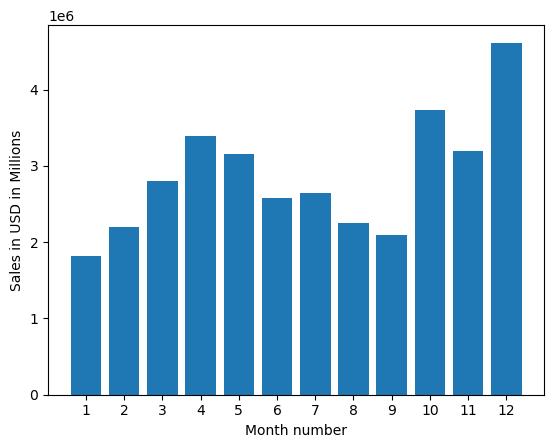

In [56]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD in Millions")
plt.xlabel("Month number")

plt.show()

#### Question 2: What city has the highest number of sales?

In [64]:
results = df.groupby(["City"])[["Quantity Ordered", "Price Each", "Sales"]].sum()
results

Quantity Ordered  Price Each       Sales
City                                                         
 Atlanta (GA)                   16602  2779908.20  2795498.58
 Austin (TX)                    11153  1809873.61  1819581.75
 Boston (MA)                    22528  3637409.77  3661642.01
 Dallas (TX)                    16730  2752627.82  2767975.40
 Los Angeles (CA)               33289  5421435.23  5452570.80
 New York City (NY)             27932  4635370.83  4664317.43
 Portland (ME)                   2750   447189.25   449758.27
 Portland (OR)                  11303  1860558.22  1870732.34
 San Francisco (CA)             50239  8211461.74  8262203.91
 Seattle (WA)                   16553  2733296.01  2747755.48

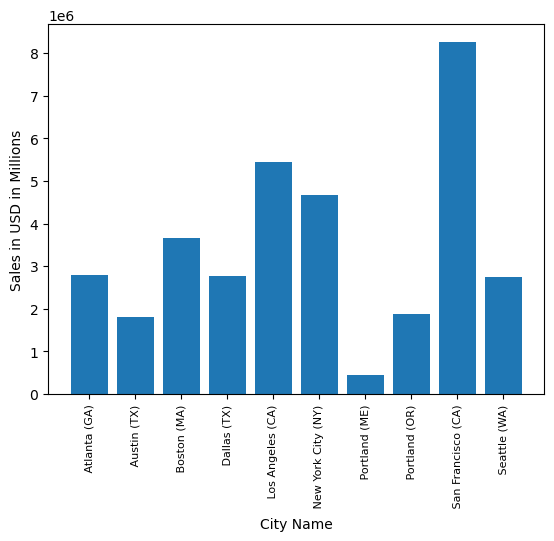

In [67]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby("City")]

plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales in USD in Millions")
plt.xlabel("City Name")

plt.show()

#### Question 3: What time should we display advertisments to maximize likelihood of customers buying products?

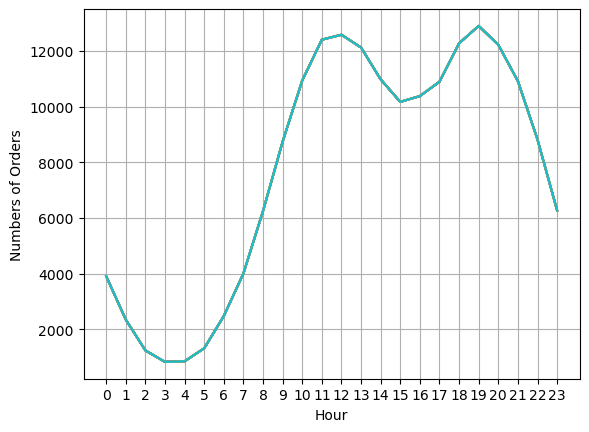

In [73]:
hours = [hour for hour, df in df.groupby("Hour")]


plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Numbers of Orders")
plt.grid()
plt.show()




# My recommendation is around 11AM and 7PM

#### Question 4: What products are most often sold together?

In [76]:
df2 = df[df['Order ID'].duplicated(keep=False)]

df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

d2 = df2[["Order ID", "Grouped"]].drop_duplicates()

df2.head() 

/var/folders/02/1wm3hh2s6rjc8lt8f6hkdnvm0000gn/T/ipykernel_23641/3461513452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


Order ID                     Product  Quantity Ordered  Price Each  \
16   295681                Google Phone                 1      600.00   
17   295681        USB-C Charging Cable                 1       11.95   
18   295681  Bose SoundSport Headphones                 1       99.99   
19   295681            Wired Headphones                 1       11.99   
36   295698             Vareebadd Phone                 1      400.00   

          Order Date                     Purchase Address  Month   Sales  \
16  1577277420000000          79 Elm St, Boston, MA 02215     12  600.00   
17  1577277420000000          79 Elm St, Boston, MA 02215     12   11.95   
18  1577277420000000          79 Elm St, Boston, MA 02215     12   99.99   
19  1577277420000000          79 Elm St, Boston, MA 02215     12   11.99   
36  1576247520000000  175 1st St, New York City, NY 10001     12  400.00   

                   City  Hour  Minute  \
16          Boston (MA)    12      37   
17          Boston (MA)    12      37   
18          Boston (MA)    12      37   
19          Boston (MA)    12      37   
36   New York City (NY)    14      32   

                                              Grouped  
16  Google Phone,USB-C Charging Cable,Bose SoundSp...  
17  Google Phone,USB-C Charging Cable,Bose SoundSp...  
18  Google Phone,USB-C Charging Cable,Bose SoundSp...  
19  Google Phone,USB-C Charging Cable,Bose SoundSp...  
36               Vareebadd Phone,USB-C Charging Cable

In [82]:
from itertools import combinations
from collections import Counter

count = Counter()

# How to get the 2 most common sold items together
for row in df2["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

    
# How to get the 3 most common sold items together
#for row in df2["Grouped"]:
    #row_list = row.split(",")
    #count.update(Counter(combinations(row_list, 3)))
    
#for key, value in count.most_common(10):
    #print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


### Question 5: What product sold the most? Why do you think it sold the most?

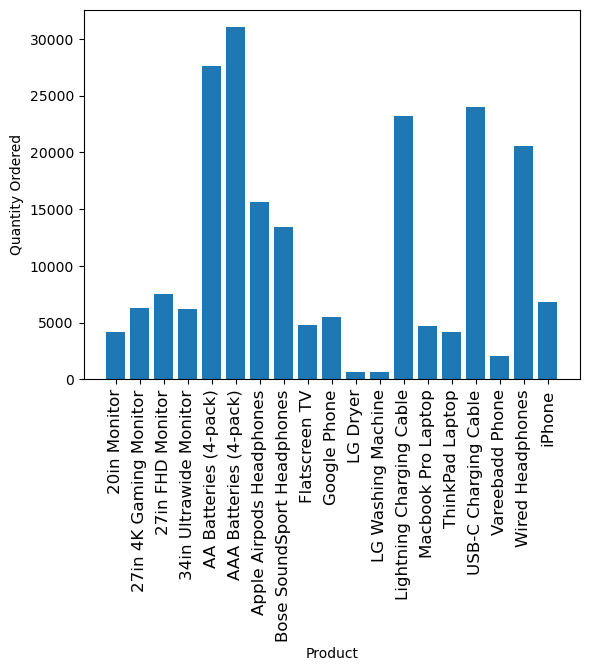

In [81]:
product_group = df.groupby(['Product'])[["Quantity Ordered", "Price Each"]]


quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]


plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation='vertical', size=12)
plt.show()

/var/folders/02/1wm3hh2s6rjc8lt8f6hkdnvm0000gn/T/ipykernel_23641/602092656.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=8)


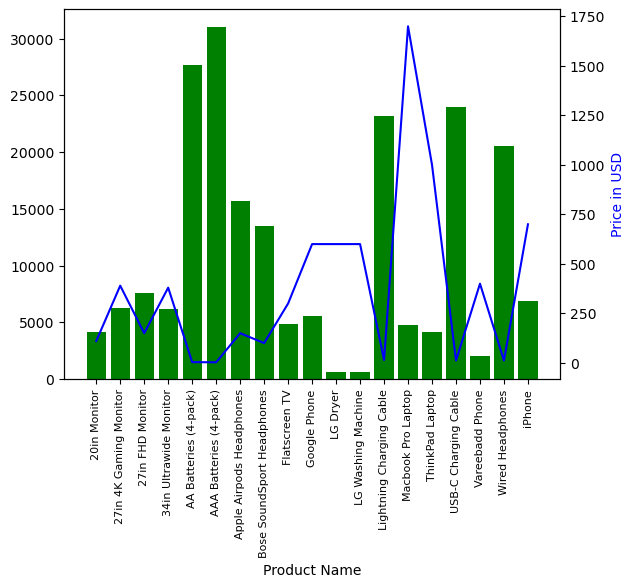

In [83]:
# Batteries got sold the most because they are cheap and needed to power eletric gadgets and equiqments.

prices = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, "b-")

ax1.set_xlabel("Product Name")
ax2.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price in USD", color="b")
ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()

